In [3]:
# import relevant packages / modules
import pandas as pd
import numpy
import statistics
import folium
import geopy
from folium.plugins import HeatMap
import branca.colormap
import matplotlib.pyplot as plt
import seaborn as sns
service = geopy.Nominatim(user_agent = "myGeocoder")

/home/pramsai/anaconda3/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
df=pd.read_csv("./Crime_Data_from_2020_to_Present.csv")
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852945,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
852946,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915
852947,230115220,07/02/2023 12:00:00 AM,07/01/2023 12:00:00 AM,1,1,Central,154,1,352,PICKPOCKET,...,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485
852948,230906458,03/05/2023 12:00:00 AM,03/05/2023 12:00:00 AM,900,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,14500 HARTLAND ST,NaN,34.1951,-118.4487


In [7]:
df.loc[:,"DR_NO":'Mocodes']

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329
...,...,...,...,...,...,...,...,...,...,...,...
852945,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416 0411 1822
852946,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0601 0445 0416 0359
852947,230115220,07/02/2023 12:00:00 AM,07/01/2023 12:00:00 AM,1,1,Central,154,1,352,PICKPOCKET,1822 0344
852948,230906458,03/05/2023 12:00:00 AM,03/05/2023 12:00:00 AM,900,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1822


In [8]:
df.shape

(852950, 28)

In [9]:
df.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [10]:
df.drop_duplicates(inplace=True)
df.shape

(852950, 28)

In [11]:
null_value_percentages=(df.isna().sum()/df.shape[0])*100
null_value_percentages

DR_NO              0.000000
Date Rptd          0.000000
DATE OCC           0.000000
TIME OCC           0.000000
AREA               0.000000
AREA NAME          0.000000
Rpt Dist No        0.000000
Part 1-2           0.000000
Crm Cd             0.000000
Crm Cd Desc        0.000000
Mocodes           13.870801
Vict Age           0.000000
Vict Sex          13.201946
Vict Descent      13.202884
Premis Cd          0.001172
Premis Desc        0.060730
Weapon Used Cd    65.209215
Weapon Desc       65.209215
Status             0.000000
Status Desc        0.000000
Crm Cd 1           0.001290
Crm Cd 2          92.670028
Crm Cd 3          99.752272
Crm Cd 4          99.992731
LOCATION           0.000000
Cross Street      84.095082
LAT                0.000000
LON                0.000000
dtype: float64

In [12]:
df["Vict Sex"].unique()

array(['F', 'M', 'X', nan, 'H', '-'], dtype=object)

In [13]:
columns_with_null_values = null_value_percentages[null_value_percentages>0]
columns_with_null_values

Mocodes           13.870801
Vict Sex          13.201946
Vict Descent      13.202884
Premis Cd          0.001172
Premis Desc        0.060730
Weapon Used Cd    65.209215
Weapon Desc       65.209215
Crm Cd 1           0.001290
Crm Cd 2          92.670028
Crm Cd 3          99.752272
Crm Cd 4          99.992731
Cross Street      84.095082
dtype: float64

In [14]:
df["Vict Descent"].unique()

array(['B', 'H', 'X', 'W', 'A', 'O', nan, 'C', 'F', 'K', 'I', 'V', 'Z',
       'J', 'P', 'S', 'G', 'U', 'D', 'L', '-'], dtype=object)

In [15]:
columns_to_drop=null_value_percentages[null_value_percentages>40]
columns_to_drop=columns_to_drop.keys()
print(columns_to_drop)
df.drop(['Mocodes'], axis=1,inplace=True)
df

Index(['Weapon Used Cd', 'Weapon Desc', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4',
       'Cross Street'],
      dtype='object')


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852945,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
852946,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915
852947,230115220,07/02/2023 12:00:00 AM,07/01/2023 12:00:00 AM,1,1,Central,154,1,352,PICKPOCKET,...,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485
852948,230906458,03/05/2023 12:00:00 AM,03/05/2023 12:00:00 AM,900,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,14500 HARTLAND ST,NaN,34.1951,-118.4487


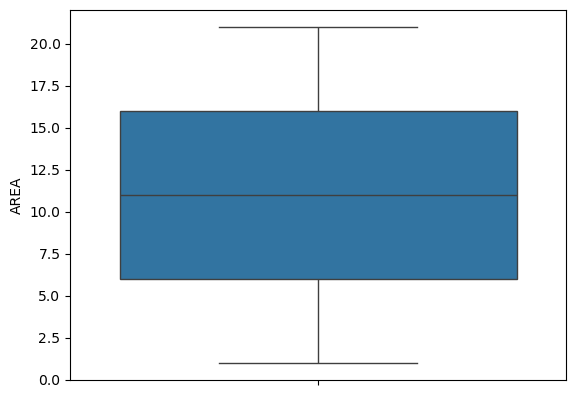

<Figure size 1000x1000 with 0 Axes>

In [16]:
sns.boxplot(df["AREA"])
plt.figure(figsize=(10, 10))
plt.show()

In [17]:
df['Crm Cd Desc'].unique()

array(['BATTERY - SIMPLE ASSAULT',
       'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE',
       'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
       'RAPE, FORCIBLE', 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
       'OTHER MISCELLANEOUS CRIME',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'BURGLARY FROM VEHICLE', 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
       'ARSON', 'INTIMATE PARTNER - SIMPLE ASSAULT',
       'THEFT PLAIN - PETTY ($950 & UNDER)', 'THEFT OF IDENTITY',
       'ROBBERY', 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'BURGLARY', 'VEHICLE - STOLEN',
       'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
       'BRANDISH WEAPON', 'INTIMATE PARTNER - AGGRAVATED ASSAULT',
       'BUNCO, GRAND THEFT', 'THEFT, PERSON',
       'BATTERY WITH SEXUAL CONTACT', 'BIKE - STOLEN',
       'BATTERY POLICE (SIMPLE)',
       'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',
       'VIOLAT

In [18]:
p=df['DATE OCC'].unique()
print(len(p))
p

1434


array(['01/08/2020 12:00:00 AM', '01/01/2020 12:00:00 AM',
       '02/13/2020 12:00:00 AM', ..., '02/22/2023 12:00:00 AM',
       '01/22/2023 12:00:00 AM', '05/07/2023 12:00:00 AM'], dtype=object)

In [ ]:
df = df[(df['LAT'] != 0) & (df['LON'] != 0)]

In [19]:
final_df = df.copy

## Bar Chart with all Places

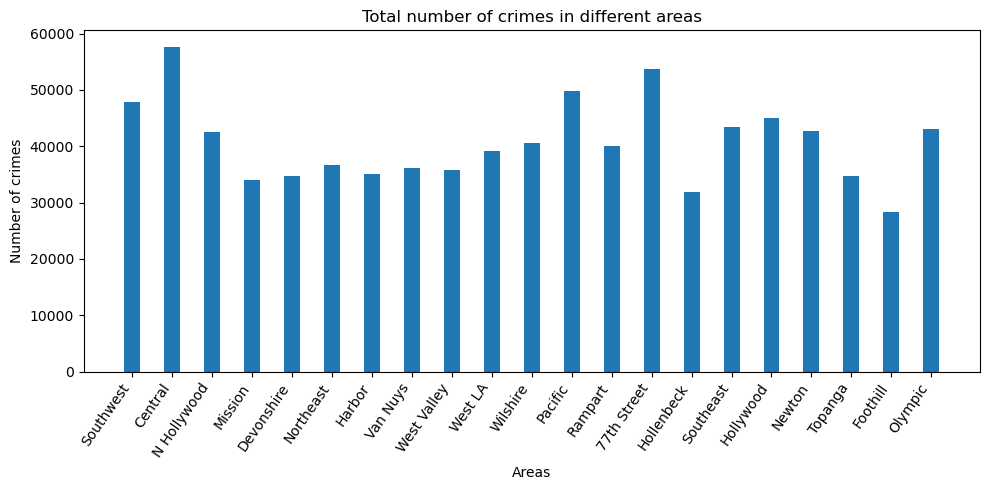

In [20]:
d = {}
for location in df["AREA NAME"].unique():
    d[location] = len(df[df["AREA NAME"] == location])

places = list(d.keys())
crime_counts = list(d.values())
  
fig = plt.figure(figsize = (10, 5))

plt.bar(places, crime_counts,width = 0.4)

plt.xlabel("Areas")
plt.ylabel("Number of crimes")
plt.title("Total number of crimes in different areas")

plt.xticks(rotation=55, ha='right')  
plt.tight_layout()  
plt.show()

## Count of crimes across days of the year

/tmp/ipykernel_11260/2589104707.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])


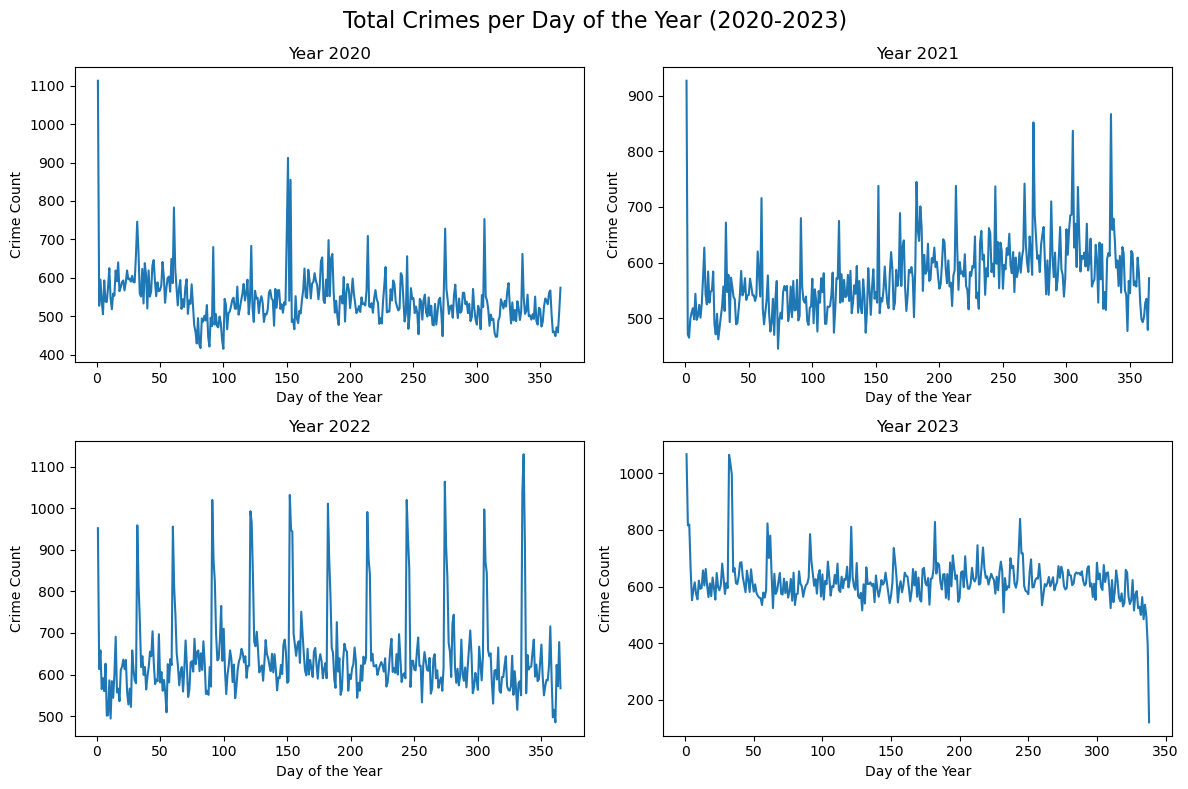

In [21]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
df['Year'] = df['DATE OCC'].dt.year
df['Day_of_Year'] = df['DATE OCC'].dt.dayofyear
grouped = df.groupby(['Year', 'Day_of_Year']).size().reset_index(name='Crime_Count')
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Total Crimes per Day of the Year (2020-2023)', fontsize=16)

years = sorted(df['Year'].unique())
for i, year in enumerate(years):
    subplot_row = i // 2 
    subplot_col = i % 2   
    data_year = grouped[grouped['Year'] == year]
    
    axs[subplot_row, subplot_col].plot(data_year['Day_of_Year'], data_year['Crime_Count'])
    axs[subplot_row, subplot_col].set_title(f'Year {year}')
    axs[subplot_row, subplot_col].set_xlabel('Day of the Year')
    axs[subplot_row, subplot_col].set_ylabel('Crime Count')

plt.tight_layout()
plt.show()


## Count of crimes across months of the year

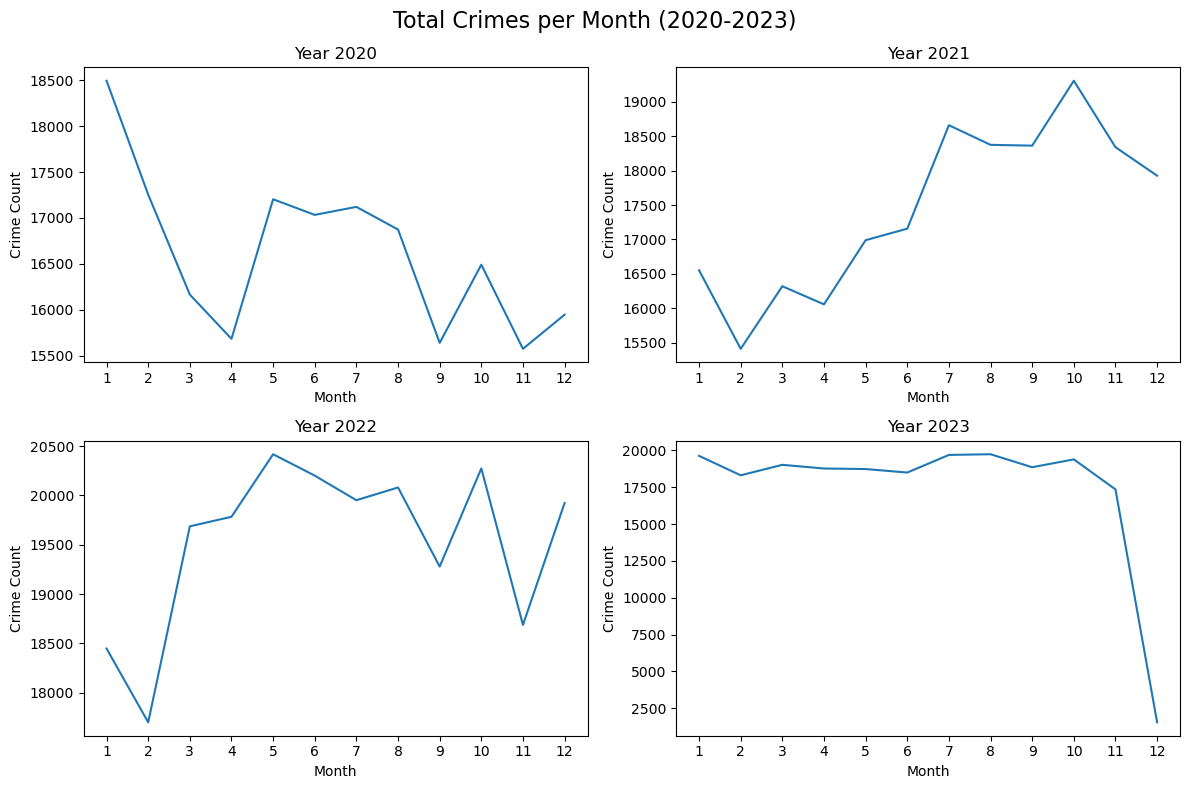

In [22]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
df['Month'] = df['DATE OCC'].dt.month
grouped = df.groupby(['Year', 'Month']).size().reset_index(name='Crime_Count')

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Total Crimes per Month (2020-2023)', fontsize=16)

years = sorted(df['Year'].unique())
for i, year in enumerate(years):
    subplot_row = i // 2  
    subplot_col = i % 2   

    data_year = grouped[grouped['Year'] == year]
    
    axs[subplot_row, subplot_col].plot(data_year['Month'], data_year['Crime_Count'])
    axs[subplot_row, subplot_col].set_title(f'Year {year}')
    axs[subplot_row, subplot_col].set_xlabel('Month')
    axs[subplot_row, subplot_col].set_ylabel('Crime Count')
    axs[subplot_row, subplot_col].set_xticks(range(1, 13))  # Show all months

plt.tight_layout()
plt.show()


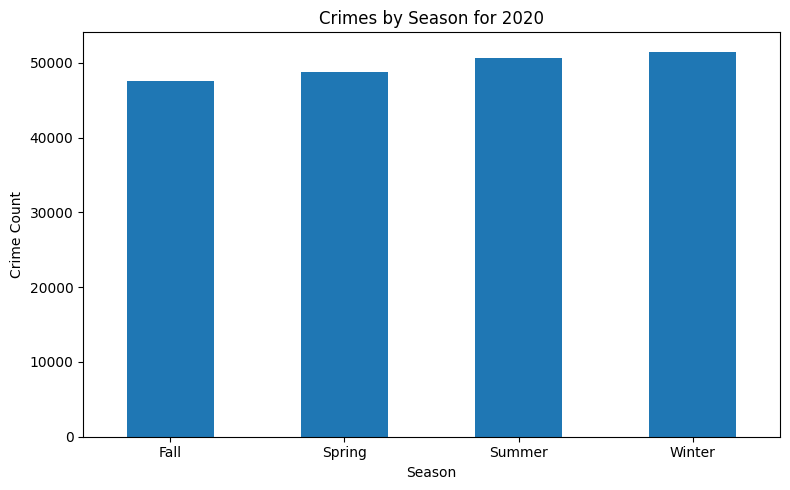

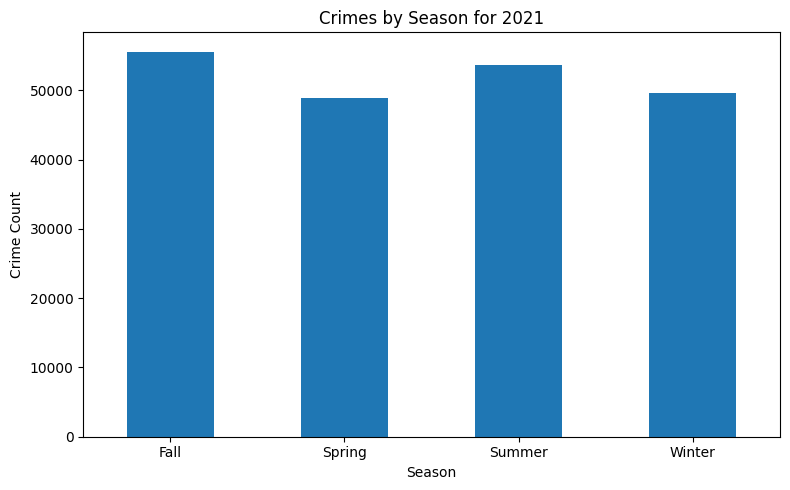

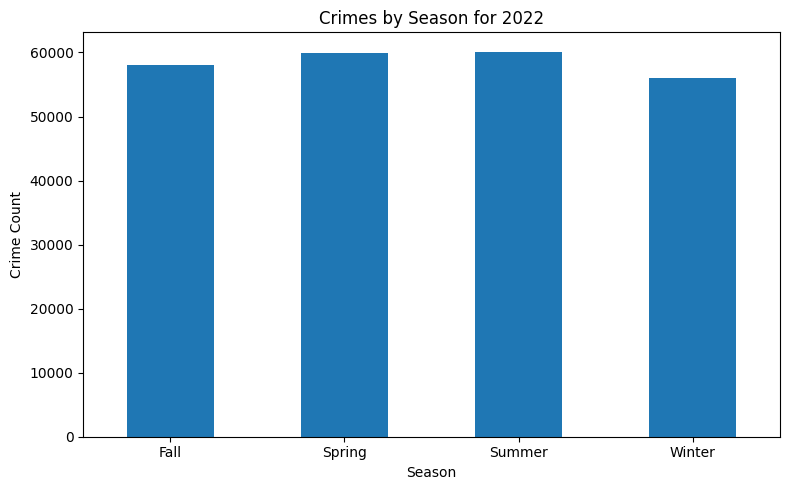

In [ ]:
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

df = df[df['DATE OCC'].dt.year != 2023]
df['Year'] = df['DATE OCC'].dt.year
df['Month'] = df['DATE OCC'].dt.month
df['Season'] = df['Month'].apply(get_season)
grouped = df.groupby(['Year', 'Season']).size().unstack().fillna(0)

years = sorted(df['Year'].unique())

for year in years:
    data_year = grouped.loc[year]
    plt.figure(figsize=(8, 5))
    data_year.plot(kind='bar')
    plt.title(f'Crimes by Season for {year}')
    plt.xlabel('Season')
    plt.ylabel('Crime Count')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


## Location Heatmap

In [23]:
def create_heat_map(area_name,month):
    if(area_name!="All"):
        filtered_df = df[df["AREA NAME"] == area_name]
    else:
        filtered_df = df
    
    filtered_df['DATE OCC'] = pd.to_datetime(filtered_df['DATE OCC'])
    filtered_df = filtered_df[filtered_df['DATE OCC'].dt.month == month]
    
    crime_map = folium.Map(location=[filtered_df['LAT'].mean(), filtered_df['LON'].mean()], zoom_start=12)
    heat_data = filtered_df[['LAT', 'LON']].values.tolist()

    normalized_heat_data = [[point[0], point[1], 1.0] for point in heat_data]  # Normalize intensity to 1.0

    HeatMap(normalized_heat_data, radius=15, max_zoom=18).add_to(crime_map)  # Set max_zoom to control color consistency

    crime_map.save(f'{area_name}-{month}.html')
    crime_map


for i in range(1,13):
    create_heat_map("All",i)

### Small Multiples

#### Crime trends between different areas across seasons

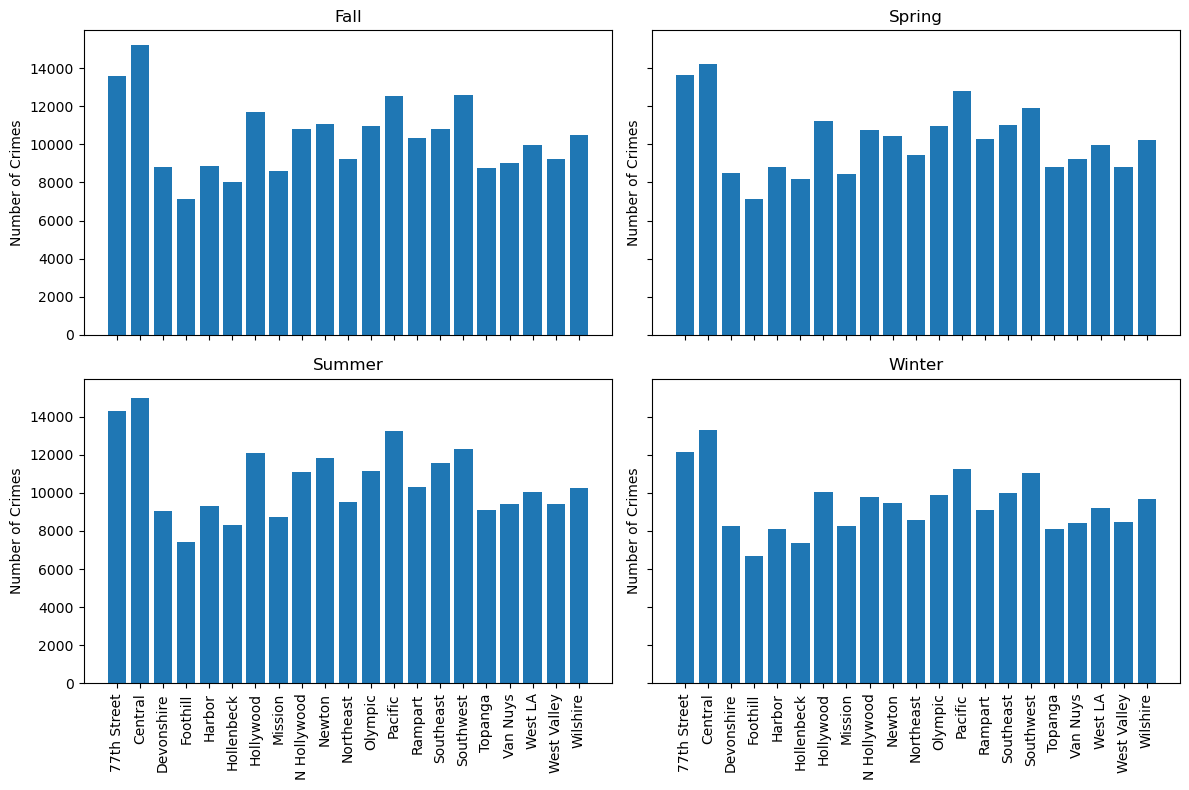

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

# Load the dataset
data = df

# Convert 'DATE OCC' column to datetime and extract month for seasons
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'])
data['Season'] = df['Month'].apply(get_season)

# # Assign season names
season_map = {1: 'Fall', 2: 'Spring', 3: 'Summer', 4: 'Winter'}
# data['Season'] = data['Season'].map(season_map)

# Group data by season and area, count number of crimes
grouped = data.groupby(['Season', 'AREA NAME']).size().reset_index(name='Crime Count')

# Get unique area names for consistent x-axis across subplots
area_names = grouped['AREA NAME'].unique()

# Plotting small multiples for each season in a 2x2 grid
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharex=True, sharey=True)

for i, season in enumerate(season_map.values()):
    ax = axs[i // 2, i % 2]  # Select subplot
    season_data = grouped[grouped['Season'] == season].set_index('AREA NAME').reindex(area_names)
    ax.bar(season_data.index, season_data['Crime Count'])
    ax.set_title(season)
    ax.set_ylabel('Number of Crimes')
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


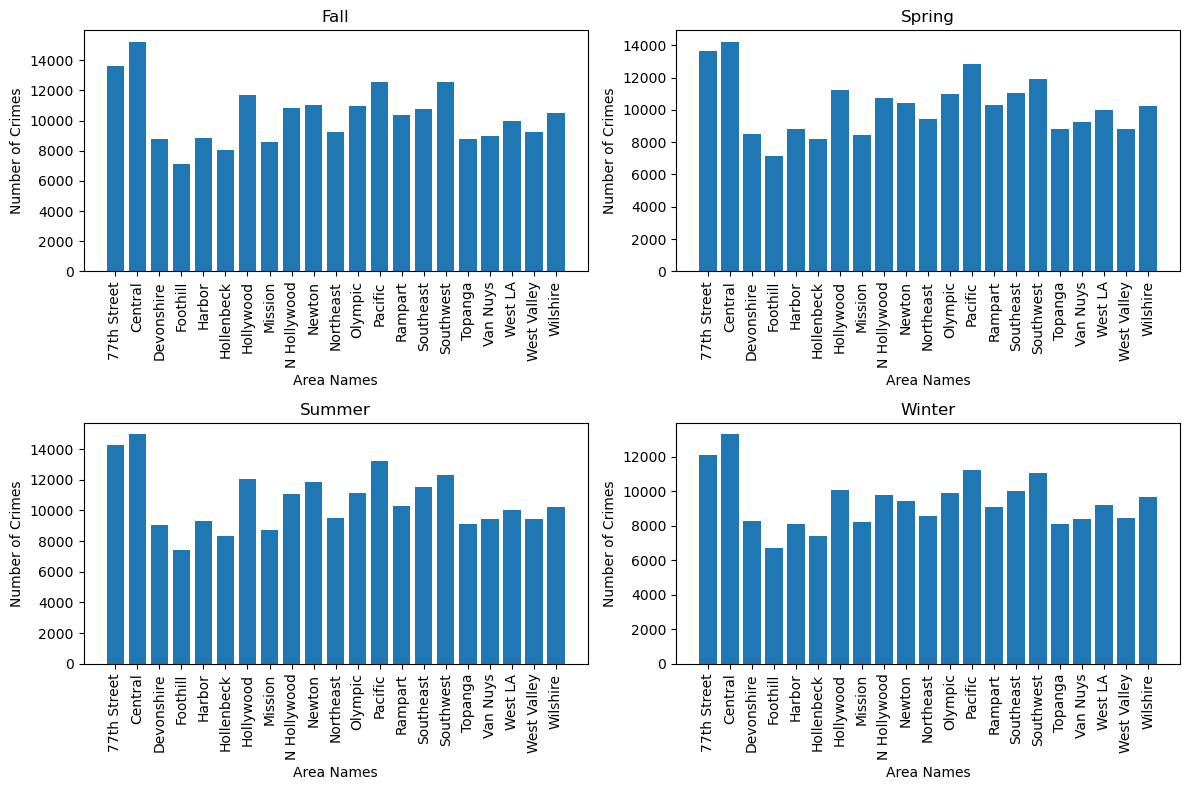

In [26]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Load the dataset
# data = df

# # Convert 'DATE OCC' column to datetime and extract month for seasons
# data['DATE OCC'] = pd.to_datetime(data['DATE OCC'])
# data['Season'] = data['DATE OCC'].dt.month.apply(lambda x: (x % 12 + 3) // 3)

# # Assign season names
# season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
# data['Season'] = data['Season'].map(season_map)

# # Group data by season and area, count number of crimes
# grouped = data.groupby(['Season', 'AREA NAME']).size().reset_index(name='Crime Count')

# # Plotting small multiples for each season
# seasons = grouped['Season'].unique()
# fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))  # 2x2 grid for 4 seasons

# for i, season in enumerate(seasons):
#     ax = axs[i // 2, i % 2]  # Select subplot
#     season_data = grouped[grouped['Season'] == season]
#     ax.bar(season_data['AREA NAME'], season_data['Crime Count'])
#     ax.set_title(season)
#     ax.set_xlabel('Area Names')
#     ax.set_ylabel('Number of Crimes')
#     ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# plt.tight_layout()
# plt.show()


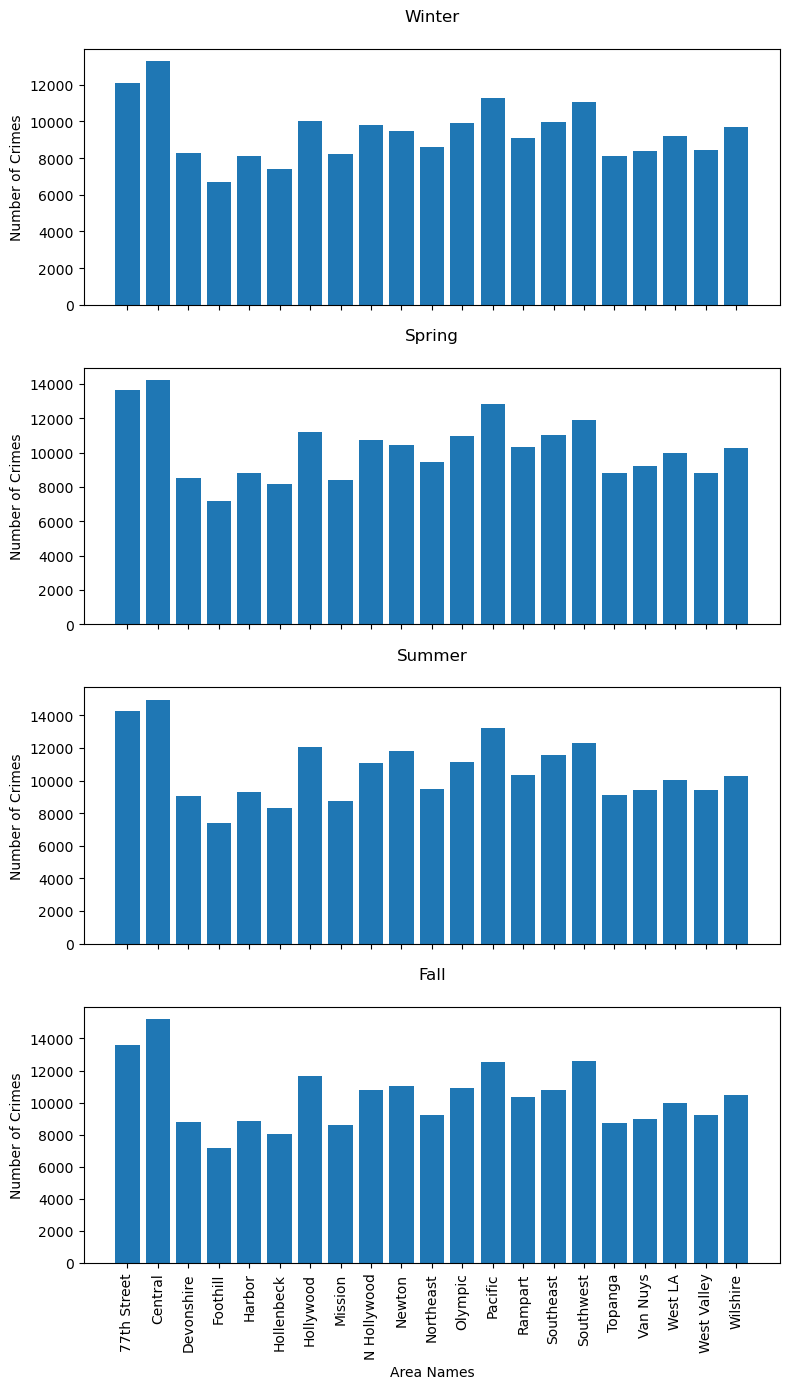

In [30]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Load the dataset
# data = df
# # Convert 'DATE OCC' column to datetime and extract month for seasons
# data['DATE OCC'] = pd.to_datetime(data['DATE OCC'])
# data['Season'] = data['DATE OCC'].dt.month.apply(lambda x: (x % 12 + 3) // 3)

# # Assign season names
# season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
# data['Season'] = data['Season'].map(season_map)

# # Group data by season and area, count number of crimes
# grouped = data.groupby(['Season', 'AREA NAME']).size().reset_index(name='Crime Count')

# # Get unique area names for consistent x-axis across subplots
# area_names = grouped['AREA NAME'].unique()

# # Plotting small multiples for each season in a single column
# fig, axs = plt.subplots(nrows=len(season_map), ncols=1, figsize=(8, 14), sharex=True)

# for i, season in enumerate(season_map.values()):
#     ax = axs[i]  # Select subplot
#     season_data = grouped[grouped['Season'] == season].set_index('AREA NAME').reindex(area_names)
#     ax.bar(season_data.index, season_data['Crime Count'])
#     ax.set_ylabel('Number of Crimes')
#     ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability
#     ax.set_title(season, pad=20, fontsize=12)  # Title outside the plot with padding

# plt.xlabel('Area Names')  # Common x-label for all subplots
# plt.tight_layout()
# plt.show()
